# Eneisoft XIII - V2

## Fase carga de datos limpios

In [88]:
from IPython.display import display, HTML

In [89]:
# Permite ajustar la anchura de la parte útil de la libreta (reduce los márgenes)
display(HTML("<style>.container{ width:98% }</style>"))

In [90]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#Cargamos el conjunto de datos datalimpia guardado en la unidad anterior - 4
filename = 'datalimpia_1.csv'
data = pd.read_csv(filename)
data.head()

,Unnamed: 0,A1_cat,A4_cat,A5_cat,A6_cat,A7_cat,A9_cat,A10_cat,A12_cat,A13_cat,A2,A3,A8,A11,A14,A15,A16
0,0,1,1,0,12,7,1,1,0,0,30.83,0.000,1.25,1,202,0,1
1,1,0,1,0,10,3,1,1,0,0,58.67,4.460,3.04,6,43,560,1
2,2,0,1,0,10,3,1,0,0,0,24.50,0.500,1.50,0,280,824,1
3,3,1,1,0,12,7,1,1,1,0,27.83,1.540,3.75,5,100,3,1
4,4,1,1,0,12,7,1,0,0,2,20.17,5.625,1.71,0,120,0,1


In [92]:
del data['Unnamed: 0']
data

,A1_cat,A4_cat,A5_cat,A6_cat,A7_cat,A9_cat,A10_cat,A12_cat,A13_cat,A2,A3,A8,A11,A14,A15,A16
0,1,1,0,12,7,1,1,0,0,30.83,0.000,1.25,1,202,0,1
1,0,1,0,10,3,1,1,0,0,58.67,4.460,3.04,6,43,560,1
2,0,1,0,10,3,1,0,0,0,24.50,0.500,1.50,0,280,824,1
3,1,1,0,12,7,1,1,1,0,27.83,1.540,3.75,5,100,3,1
4,1,1,0,12,7,1,0,0,2,20.17,5.625,1.71,0,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648,-1,2,2,4,3,0,0,0,0,21.08,10.085,1.25,0,260,0,0
649,0,1,0,1,7,0,1,1,0,22.67,0.750,2.00,2,200,394,0
650,0,2,2,5,2,0,1,1,0,25.25,13.500,2.00,1,200,1,0
651,0,1,0,0,7,0,0,0,0,17.92,0.205,0.04,0,280,750,0


In [93]:
#Dimensiones de nuestro dataset limpio.
data.shape

(653, 16)

In [94]:
data.describe()

,A1_cat,A4_cat,A5_cat,A6_cat,A7_cat,A9_cat,A10_cat,A12_cat,A13_cat,A2,A3,A8,A11,A14,A15,A16
count,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000,653.000000
mean,0.667688,1.229709,0.468606,5.773354,5.084227,0.534456,0.439510,0.462481,0.165391,31.503813,4.829533,2.244296,2.502297,180.359877,1013.761103,0.453292
std,0.502888,0.428193,0.845963,4.296249,2.494278,0.499194,0.496708,0.498973,0.548475,11.838267,5.027077,3.371120,4.968497,168.296811,5253.278504,0.498195
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,22.580000,1.040000,0.165000,0.000000,73.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,6.000000,7.000000,1.000000,0.000000,0.000000,0.000000,28.420000,2.835000,1.000000,0.000000,160.000000,5.000000,0.000000
75%,1.000000,1.000000,0.000000,10.000000,7.000000,1.000000,1.000000,1.000000,0.000000,38.250000,7.500000,2.625000,3.000000,272.000000,400.000000,1.000000
max,1.000000,2.000000,2.000000,13.000000,8.000000,1.000000,1.000000,1.000000,2.000000,76.750000,28.000000,28.500000,67.000000,2000.000000,100000.000000,1.000000


## Fase de modelado

### Creación del conjunto de entrenamiento y validación

In [99]:
#Creando arrays a partir de los valores del dataset "data"
array_clas = data.values
X_clas = array_clas[ : , 0:15]
Y_clas = array_clas[ : , 15]

validation_size = 0.20
seed = 7

In [100]:
#Escalamiento de datos
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_clas)
scaler
scaler.mean_
scaler.scale_
X_scaled = scaler.transform(X_clas)
X_scaled

array([[ 0.66131495, -0.53687283, -0.55435692, ..., -0.30259629,
         0.12868165, -0.19312477],
       [-1.32872498, -0.53687283, -0.55435692, ...,  0.70451573,
        -0.81680202, -0.08644296],
       [-1.32872498, -0.53687283, -0.55435692, ..., -0.50401869,
         0.59250383, -0.0361501 ],
       ...,
       [-1.32872498,  1.80031354,  1.81162393, ..., -0.30259629,
         0.11678877, -0.19293427],
       [-1.32872498, -0.53687283, -0.55435692, ..., -0.50401869,
         0.59250383, -0.05024734],
       [ 0.66131495, -0.53687283, -0.55435692, ..., -0.50401869,
        -1.07249886, -0.19312477]])

In [101]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_scaled, Y_clas, test_size=validation_size, random_state=seed)

### Algritmos Lineales

#### Logistic Regression

In [102]:
# Logistic Regression Classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=None)
model = LogisticRegression(solver= 'lbfgs', max_iter=5000)
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(f'Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)')

Accuracy: 86.60% (4.52%)


#### Linear Discriminant Analysis - LDA

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

kfold = KFold(n_splits=10, random_state=None)
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(f'Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)')

Accuracy: 86.79% (4.12%)


### Algoritmos No Lineales

#### k-Nearest Neighbours

In [104]:
# KNN Classification
from sklearn.neighbors import KNeighborsClassifier

kfold = KFold(n_splits=8, random_state=None)
model = KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree')
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(f'Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)')

Accuracy: 84.49% (4.75%)


#### Naive Bayes

In [105]:
# Gaussian Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB

kfold = KFold(n_splits=10, random_state=None)
model = GaussianNB()
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(f'Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f})')

Accuracy: 79.89% (4.43)


#### Decision Tree Classification

In [106]:
# CART Classification
from sklearn.tree import DecisionTreeClassifier

kfold = KFold(n_splits=10, random_state=None)
model = DecisionTreeClassifier(criterion= 'entropy')
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(f'Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f})')

Accuracy: 81.22% (5.36)


#### Super Vector Machine

In [107]:
# SVM Classification
from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state=None)
model = SVC()
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(f'Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f})')

Accuracy: 85.44% (5.71)


## Fase evaluación de los modelos lineales y no lineales

In [108]:
# Comparamos los algorithms
models = []
models.append(('LR', LogisticRegression(solver= 'lbfgs', max_iter=5000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier(n_neighbors=8)))
models.append(('CART', DecisionTreeClassifier(criterion= 'entropy')))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turnmodels = 
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{names}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

['LR']: 86.60% (4.52%)
['LR', 'LDA']: 86.79% (4.12%)
['LR', 'LDA', 'K-NN']: 84.48% (4.82%)
['LR', 'LDA', 'K-NN', 'CART']: 81.22% (4.71%)
['LR', 'LDA', 'K-NN', 'CART', 'NB']: 79.89% (4.43%)
['LR', 'LDA', 'K-NN', 'CART', 'NB', 'SVM']: 85.44% (5.71%)


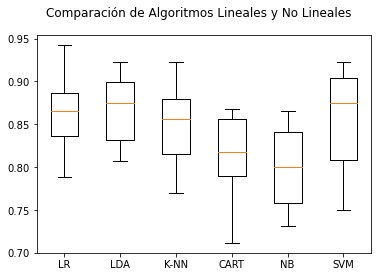

In [109]:
# boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('Comparación de Algoritmos Lineales y No Lineales')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Los resultados sugieren profundizar en los algoritmos LDA y  LR. Es muy probable que una configuración más allá de la predeterminada pueda generar modelos con mejor desempeño.

## Fase optimización de los mejores modelos lineales y no lineales

In [110]:
#Se seteo los parámetros con los valores asignados por compatibilidad entre los parámetros 'solver' y 'shrinkage'
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

kfold = KFold(n_splits=10, random_state=None)
model = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto')
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(f'Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)')

Accuracy: 86.40% (4.22%)


El proceso de optimización de un modelo algorítmico requiere una investigación profunda de los parámetros/hiperparámetros con los que trabaja cada modelo por lo que no siempre se obtiene los resultados esperados. En este caso, sin la optimización del modelo LDA se obtuvo 86.79% de acierto respecto a 86.40% con optimización. Por lo que el impacto ha sido insignificante en este caso.

In [111]:
#Se seteo los parámetros con los valores asignados por compatibilidad entre los parámetros 'penalty' y 'solver'
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=None)
model = LogisticRegression(penalty='l1',solver= 'liblinear', max_iter=1000)
results = cross_val_score(model, X_train, Y_train, cv=kfold)
print(f'Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)')

Accuracy: 86.41% (4.21%)


En este caso, se observa que la optimización del modelo LR sin la optimización del modelo obtuvo 86.60% de acierto respecto a 86.41% con optimización. Por lo que el impacto ha sido insignificante en este caso.

### Algoritmos de conjuntos o ensamblados

Otra forma en que podemos mejorar el rendimiento de los algoritmos en este problema es mediante el uso de modelos ensamblados. En esta sección evaluaremos cuatro algoritmos ensamblados diferentes, dos tipo Boosting y dos tipo  Bagging:
* Métodos Boosting: AdaBoost (AB) y Gradient Boosting (GBM).
* Métodos Bagging: Random Forest (RF) y Extra Trees (ET).

Utilizaresmo una validación cruzada de 10. No se utiliza la estandarización de datos en este caso porque los cuatro algoritmos de conjunto se basan en árboles de decisión que son menos sensibles a las distribuciones de datos.

In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [113]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()*100.0:,.2f}% ({cv_results.std()*100.0:,.2f}%)")

AB: 85.63% (4.86%)
GBM: 86.01% (5.03%)
RF: 88.31% (6.11%)
ET: 87.74% (5.10%)


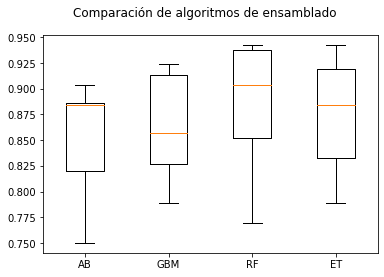

In [114]:
# Comparamos los algoritmos de conjunto
fig = plt.figure()
fig.suptitle('Comparación de algoritmos de ensamblado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Los resultados sugieren que RF y ET puede ser digno de una mayor investigación con una media fuerte y una extensión que se inclina al 90% de Accuracy.,

## Fase optimización de los mejores modelos ensamblados

In [115]:
#Se seteo bootstrap en True para que no considere todo el dataset
from sklearn.ensemble import RandomForestClassifier
kfold = KFold(n_splits=10, random_state=None)
model = RandomForestClassifier(bootstrap=True)
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(f'Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)')

Accuracy: 88.31% (5.54%)


En este caso, se observa que la optimización del modelo RF mantuvo el mismo porcentaje de acierto que el modelo sin optimización por lo que podría seguir investigando para complejizar un poco el modelo a fin de obtener un mejor Accuracy.

In [122]:
#El parámetros 'exponential' se usó para aplicar el efecto del algoritmo AdaBoost en lugar de LR si se por default. Learning_rate contribuye en el aprendizaje de los valores calculados para generar el siguiente árbol.
from sklearn.ensemble import ExtraTreesClassifier
kfold = KFold(n_splits=10, random_state=None)
model = ExtraTreesClassifier(criterion='log_loss', max_features='log2', bootstrap=True, oob_score=False)
results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(f'Accuracy: {results.mean()*100.0:,.2f}% ({results.std()*100.0:,.2f}%)')

Accuracy: 87.94% (4.93%)


En este caso, se observa que la optimización del modelo ET obtuvo una ligera mejora en el porcentaje de acierto de la clase target. Obteniendo 87.94% frente a 87.74% que se obtuvo antes de realizar el tuneo del modelo.

## Fase de Forecasting o Fase de Validación

El RF mostró el mejor resultado (88.31%) como un modelo estable y de baja complejidad. En esta sección finalizaremos el modelo entrenándolo en todo el conjunto de datos de entrenamiento y haremos predicciones para el conjunto de datos de validación para confirmar nuestros hallazgos.

In [126]:
# Prepare aand Finalize Model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = RandomForestClassifier()
model.fit(rescaledX, Y_train)

# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8549618320610687
[[71  9]
 [10 41]]
              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88        80
         1.0       0.82      0.80      0.81        51

    accuracy                           0.85       131
   macro avg       0.85      0.85      0.85       131
weighted avg       0.85      0.85      0.85       131



Podemos ver que alcanzamos una precisión de 85% en el conjunto de datos de validación. Un porcentaje de acierto significativamente balanceado considerando que el Accuracy logrado durante el entrenamiento + optimización del modelo alcanzó 87.94% con lo cual se demuestra que se ha validado correctamente el mejor modelo.